<a href="https://colab.research.google.com/github/Anthonerp/HoangIntroToMachineLearning/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

print("Dataset:", breast_cancer.DESCR.splitlines()[0])
print("Feature matrix shape (samples, features):", X.shape)
print("Target vector shape:", y.shape)
print("Target names:", breast_cancer.target_names)
print("Class counts:", dict(zip(*np.unique(y, return_counts=True))))

Dataset: .. _breast_cancer_dataset:
Feature matrix shape (samples, features): (569, 30)
Target vector shape: (569,)
Target names: ['malignant' 'benign']
Class counts: {np.int64(0): np.int64(212), np.int64(1): np.int64(357)}


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=11,
    stratify=y
)

print("Training set size:", X_train.shape, "Targets:", y_train.shape)
print("Testing set size: ", X_test.shape,  "Targets:", y_test.shape)


Training set size: (426, 30) Targets: (426,)
Testing set size:  (143, 30) Targets: (143,)


In [4]:
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [5]:
y_pred = nb.predict(X_test)
test_score = nb.score(X_test, y_test)

print("GaussianNB test accuracy (score):", test_score)

GaussianNB test accuracy (score): 0.9230769230769231


In [6]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[45  8]
 [ 3 87]]


In [7]:
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))


              precision    recall  f1-score   support

   malignant       0.94      0.85      0.89        53
      benign       0.92      0.97      0.94        90

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



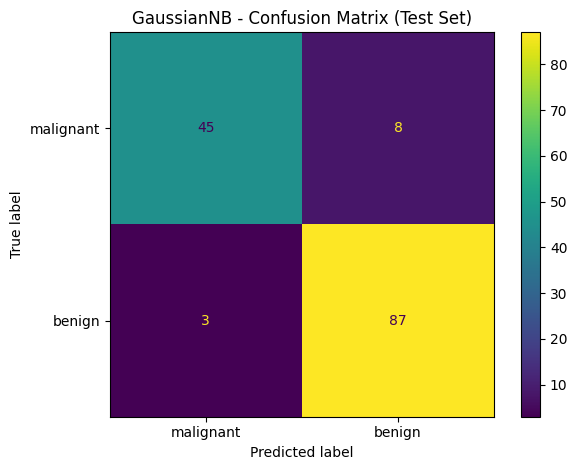

In [8]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
disp.plot(values_format="d")
plt.title("GaussianNB - Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()


In [9]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

print("GaussianNB 10-fold CV scores:", scores)
print("GaussianNB 10-fold CV mean:", scores.mean())
print("GaussianNB 10-fold CV std: ", scores.std())


GaussianNB 10-fold CV scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
GaussianNB 10-fold CV mean: 0.9384711779448622
GaussianNB 10-fold CV std:  0.02750305414538902


In [10]:
estimators = {
    "GaussianNB": GaussianNB(),
    "KNeighborsClassifier": Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier())
    ]),
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression(solver="lbfgs", multi_class="ovr", max_iter=10000))
    ]),
    "SVC": Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC(gamma="scale"))
    ])
}

print("Model comparison via 10-fold cross-validation:")
model_results = []

for name, estimator in estimators.items():
    cv_scores = cross_val_score(estimator=estimator, X=X, y=y, cv=kfold)
    model_results.append((name, cv_scores.mean(), cv_scores.std()))
    print(f"{name:>20s} | mean={cv_scores.mean():.4f} | std={cv_scores.std():.4f}")

best = max(model_results, key=lambda t: t[1])
print()
print(f"Best by mean CV accuracy: {best[0]} (mean={best[1]:.4f}, std={best[2]:.4f})")


Model comparison via 10-fold cross-validation:
          GaussianNB | mean=0.9385 | std=0.0275
KNeighborsClassifier | mean=0.9683 | std=0.0190


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

  LogisticRegression | mean=0.9789 | std=0.0131
                 SVC | mean=0.9789 | std=0.0132

Best by mean CV accuracy: LogisticRegression (mean=0.9789, std=0.0131)
